In [1]:
import pandas as pd
import numpy as np
import sqlite3 
import math
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
con = sqlite3.connect('output/database.sqlite')
data = pd.read_sql('SELECT UNITID, INSTNM, cast(SAT_AVG as int)SAT_AVG, cast(ACTENMID as int)ACTENMID, cast(ACTMTMID as int)ACTMTMID,\
                  cast(ACTWRMID as int)ACTWRMID, cast(TUITIONFEE_PROG as int)TUITIONFEE_PROG, cast(MD_EARN_WNE_P10 as int)MD_EARN_WNE_P10,\
                  cast(UNEMP_RATE as int) UNEMP_RATE, cast(MD_EARN_WNE_P6 as int)MD_EARN_WNE_P6, cast(ADM_RATE as int) ADM_RATE,\
                  cast(TUITIONFEE_IN as int) TUITIONFEE_IN,cast(TUITIONFEE_OUT as int) TUITIONFEE_OUT, CONTROL,STABBR from Scorecard', con)
df_copy = data.copy()



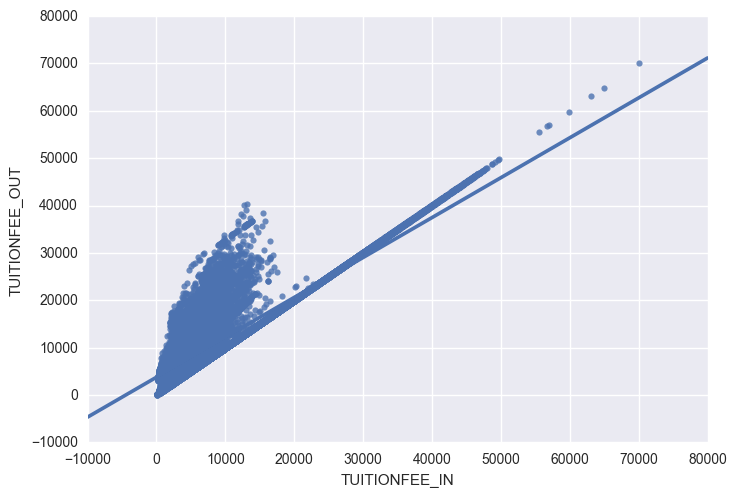

In [2]:
inout = df_copy.copy()
inout = inout[(inout.TUITIONFEE_IN > 0) & (inout.TUITIONFEE_OUT > 0)]
inout = inout[['TUITIONFEE_IN','TUITIONFEE_OUT','CONTROL']]
sns.regplot(inout.TUITIONFEE_IN,inout.TUITIONFEE_OUT,scatter=True,fit_reg=True)
plt.show()

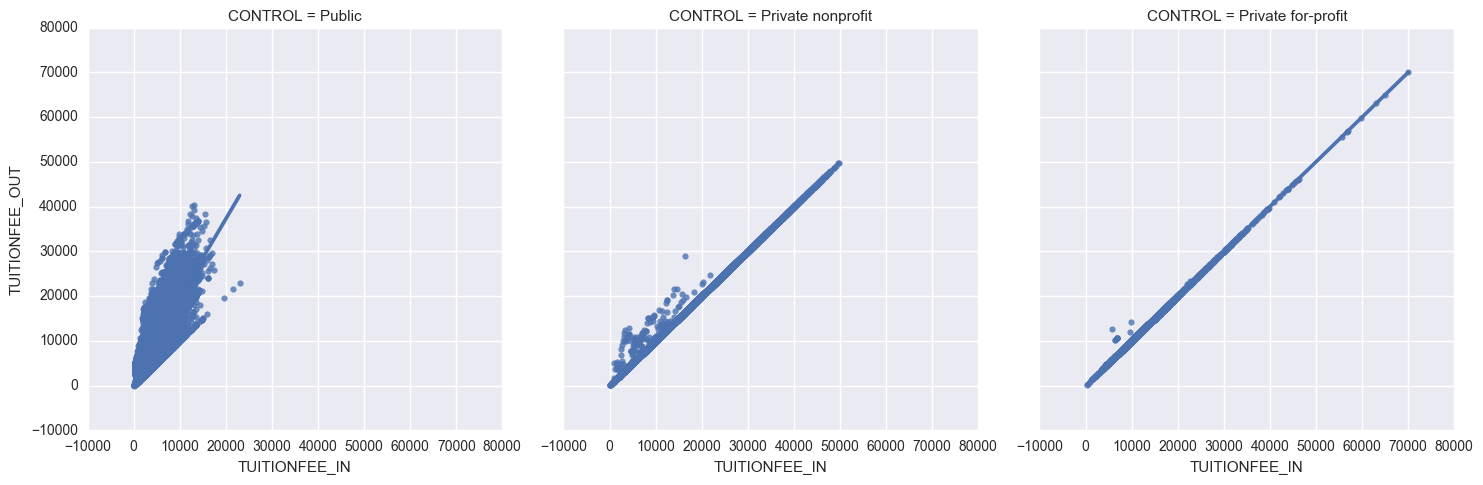

In [3]:
sns.lmplot(x="TUITIONFEE_IN",y="TUITIONFEE_OUT",col="CONTROL",data = inout,truncate=True)
plt.show()

In [4]:
inout.groupby('CONTROL').mean()

,TUITIONFEE_IN,TUITIONFEE_OUT
CONTROL,,
Private for-profit,12866.961431,12870.163045
Private nonprofit,17554.040965,17580.530117
Public,3544.328542,8433.536785


In [5]:
asd = df_copy.copy()
asd = asd[['INSTNM','STABBR']]
asd = asd.groupby('STABBR').count().sort_values('INSTNM')
asd

,INSTNM
STABBR,
MP,18
PW,18
AS,18
MH,19
VI,37
FM,47
GU,48
AK,185
WY,215


In [6]:
asd = df_copy.copy()
asd = asd[asd['UNEMP_RATE']>0]
asd = asd[['INSTNM','STABBR','UNEMP_RATE',]]
asd = asd.sort_values('UNEMP_RATE',ascending=False)
asd.head(6)

,INSTNM,STABBR,UNEMP_RATE
12221,STONE CHILD COLLEGE,MT,15.0
38039,STONE CHILD COLLEGE,MT,15.0
64202,Stone Child College,MT,15.0
6874,ALASKA VOCATIONAL TECHNICAL CENTER,AK,15.0
51064,STONE CHILD COLLEGE,MT,15.0
25200,STONE CHILD COLLEGE,MT,15.0


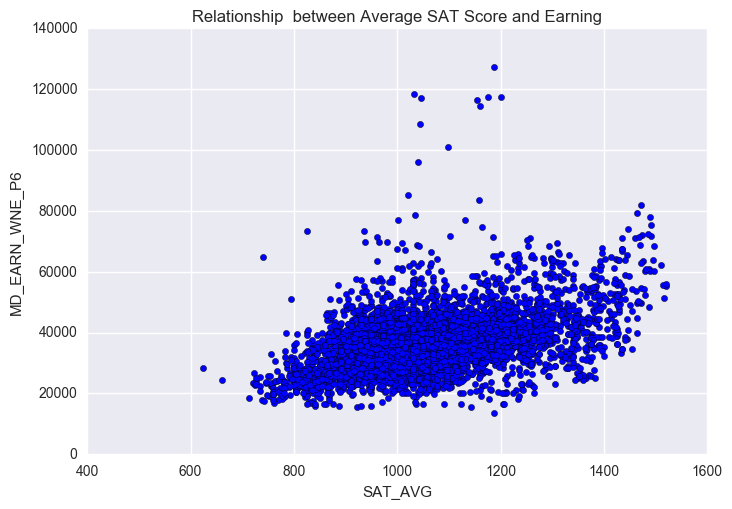

In [7]:
Sat_6yEarn = df_copy[(df_copy.SAT_AVG > 0) & (df_copy.MD_EARN_WNE_P6 > 0) ]
plt.scatter(Sat_6yEarn['SAT_AVG'], Sat_6yEarn['MD_EARN_WNE_P6'])
plt.xlabel('SAT_AVG')
plt.ylabel('MD_EARN_WNE_P6')
plt.title("Relationship  between Average SAT Score and Earning")
plt.show()

#clearly an increasing sign

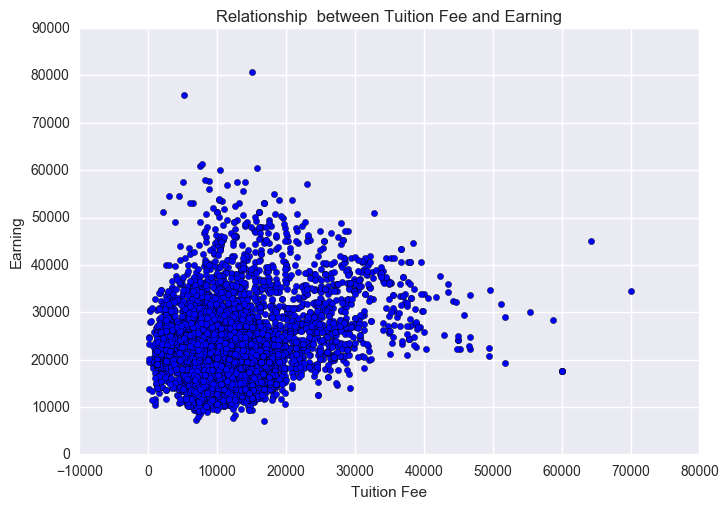

In [8]:
#find if Tuition fee affect Earning
Tui_6yEarn = df_copy[(df_copy.TUITIONFEE_PROG > 0) & (df_copy.MD_EARN_WNE_P6 > 0) ]
plt.scatter(Tui_6yEarn['TUITIONFEE_PROG'], Tui_6yEarn['MD_EARN_WNE_P6'])
plt.xlabel('Tuition Fee')
plt.ylabel('Earning')
plt.title("Relationship  between Tuition Fee and Earning")
plt.show()
#not quite, and hard to see as most of the tuition fee fall in the lower range

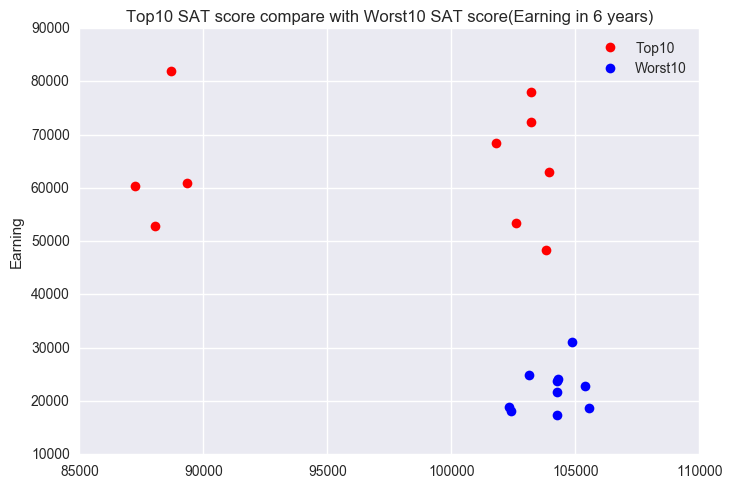

In [9]:
Sat3_6yEarn = df_copy[(df_copy.ACTENMID > 0)  & (df_copy.ACTMTMID > 0) & (df_copy.ACTWRMID > 0) & (df_copy.MD_EARN_WNE_P6 > 0) ]
acs = Sat3_6yEarn.sort_values(['ACTENMID', 'ACTMTMID', 'ACTWRMID'], ascending = False).head(10)
des = Sat3_6yEarn.sort_values(['ACTENMID', 'ACTMTMID', 'ACTWRMID'], ascending = True).head(10)
top = plt.plot(acs['MD_EARN_WNE_P6'],'ro', label="Top10")
btn = plt.plot(des['MD_EARN_WNE_P6'],'bo', label="Worst10")  

plt.title("Top10 SAT score compare with Worst10 SAT score(Earning in 6 years)")
plt.legend()
plt.ylabel('Earning')
plt.show()
#red mean the top 10 SAT score in read, writing and english
#blue mean the least 10 SAT score in read, writing and english
#clearly we can know that red earn high than blue

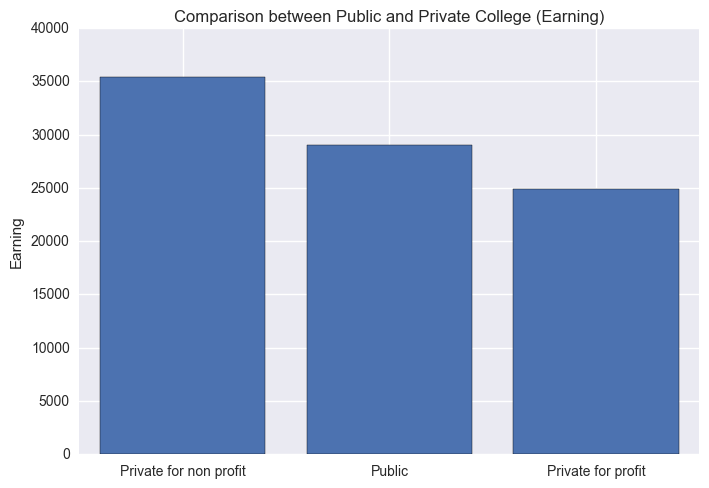

In [10]:
public = df_copy[(df_copy.CONTROL == 'Public')]
private_np = df_copy[(df_copy.CONTROL == 'Private nonprofit')]
private_p = df_copy[(df_copy.CONTROL == 'Private for-profit')]
public = public[public.MD_EARN_WNE_P6 > 0]
private_np = private_np[private_np.MD_EARN_WNE_P6 > 0]
private_p = private_p[private_p.MD_EARN_WNE_P6 > 0]
x = sum(public['MD_EARN_WNE_P6'])/len(public)
y = sum(private_np['MD_EARN_WNE_P6'])/len(private_np)
z = sum(private_p['MD_EARN_WNE_P6'])/len(private_p)
dictionary = plt.figure()

D = {u'Public':x, u'Private for non profit': y, u'Private for profit':z}

plt.title("Comparison between Public and Private College (Earning)")
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.ylabel('Earning')
plt.show()

Estimated intercept 3
          f          est
0  ACTENMID -1189.144312
1  ACTMTMID  2910.042421
2  ACTWRMID    -3.014084


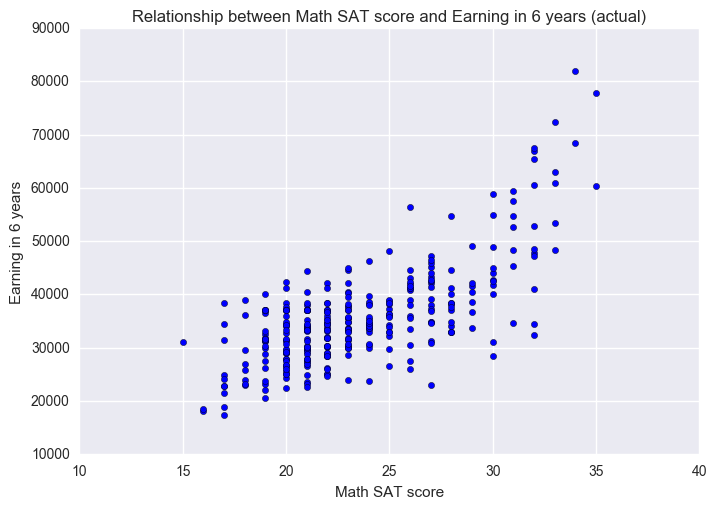

In [11]:
linear_data = df_copy.copy()
linear_data = linear_data[(linear_data.ACTENMID > 0)  & (linear_data.ACTMTMID > 0) & (linear_data.ACTWRMID > 0) & (linear_data['MD_EARN_WNE_P6']>0)]
linear_data = linear_data[['ACTENMID', 'ACTMTMID', 'ACTWRMID','MD_EARN_WNE_P6']]

from sklearn.linear_model import LinearRegression
x = linear_data.drop('MD_EARN_WNE_P6' , axis = 1)
lm = LinearRegression()
lm.fit(x,linear_data.MD_EARN_WNE_P6)

print ('Estimated intercept', len(lm.coef_))
a = pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['f', 'est'])
print(a)
#since SAT math is the highest corelation, hence we plot SAT math

plt.scatter(linear_data.ACTMTMID, linear_data.MD_EARN_WNE_P6)
plt.xlabel("Math SAT score")
plt.ylabel("Earning in 6 years")
plt.title("Relationship between Math SAT score and Earning in 6 years (actual)")
plt.show()

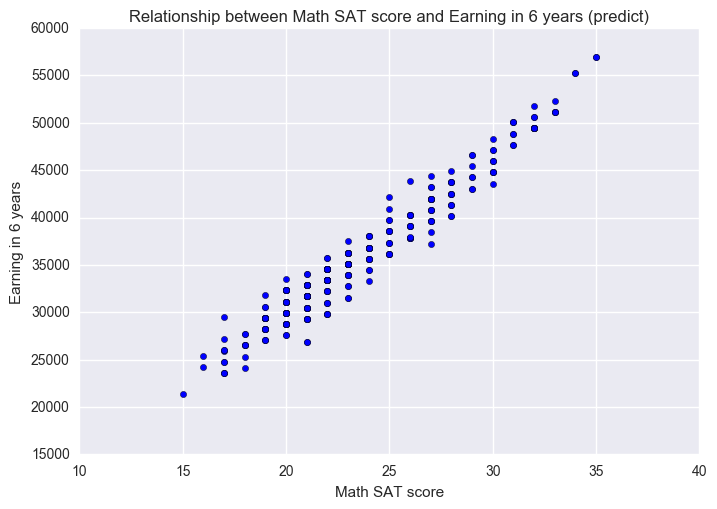

In [12]:
lm.predict(x)[0:328]
plt.scatter(linear_data.ACTMTMID, lm.predict(x))
plt.xlabel("Math SAT score")
plt.ylabel("Earning in 6 years")
plt.title("Relationship between Math SAT score and Earning in 6 years (predict)")
plt.show()

In [13]:
import sklearn.cross_validation
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, linear_data.MD_EARN_WNE_P6, test_size = 0.33, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 3)
(109, 3)
(219,)
(109,)


In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [15]:
print("Train mean square error:", np.mean((y_train - lm.predict(x_train)) ** 2))
print("Test mean square error:", np.mean((y_test - lm.predict(x_test)) ** 2))

Train mean square error: 39191974.760901645
Test mean square error: 42488041.97791104


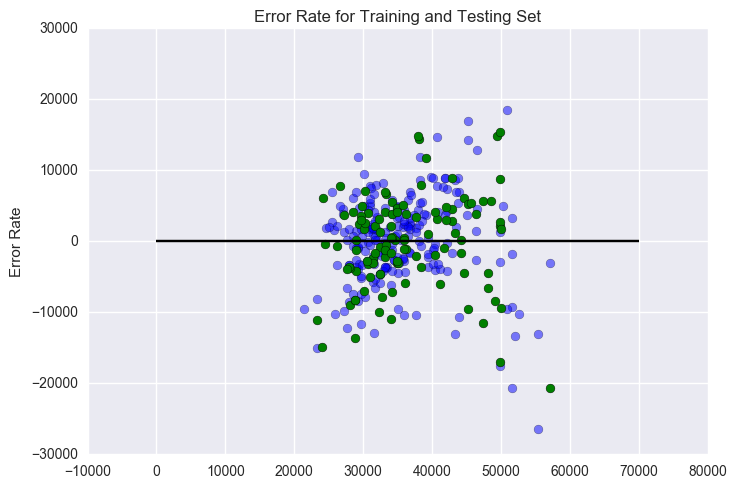

In [16]:
plt.scatter(lm.predict(x_train),lm.predict(x_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 70000)
plt.title('Error Rate for Training and Testing Set')
plt.ylabel('Error Rate')
plt.show()

#most of it scatter around 0, good!

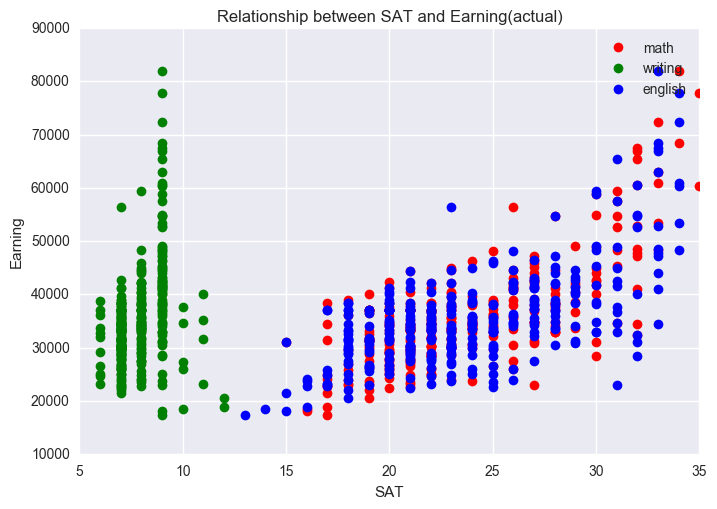

In [17]:
from sklearn import linear_model
import numpy as np
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
pred_test = lm.predict(x_test)
fit = np.polyfit(x['ACTMTMID'],linear_data.MD_EARN_WNE_P6,1)
p = np.poly1d(fit)
math = plt.plot(x['ACTMTMID'], linear_data.MD_EARN_WNE_P6, 'ro', label = "math")
writing = plt.plot(x['ACTWRMID'], linear_data.MD_EARN_WNE_P6, 'go', label = "writing")
english = plt.plot(x['ACTENMID'], linear_data.MD_EARN_WNE_P6, 'bo', label = "english")
plt.title("Relationship between SAT and Earning(actual)")
plt.xlabel("SAT")
plt.ylabel("Earning")
plt.legend()
plt.show()

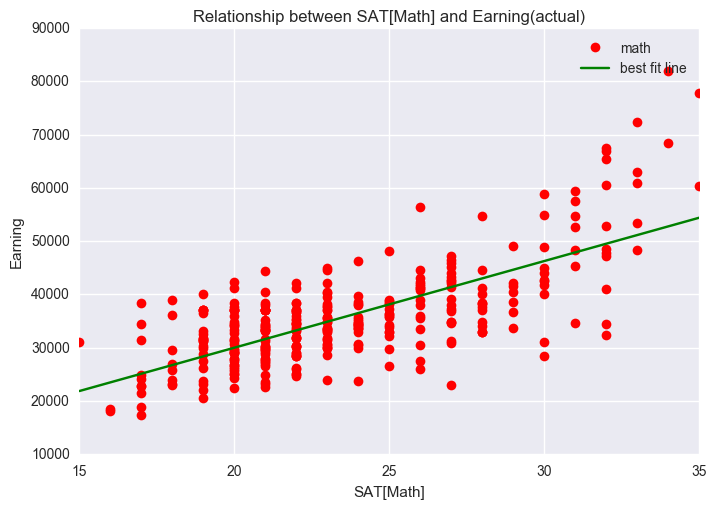

In [18]:
#since we know math has highest corelation, try to fit and compare using it
math = plt.plot(x['ACTMTMID'], linear_data.MD_EARN_WNE_P6, 'ro', label = "math")
xp = np.linspace(15, 35, 50)
best_fit = plt.plot(xp, p(xp), '-', color='green', label="best fit line")

plt.title("Relationship between SAT[Math] and Earning(actual)")
plt.xlabel("SAT[Math]")
plt.ylabel("Earning")
plt.legend()
plt.show()

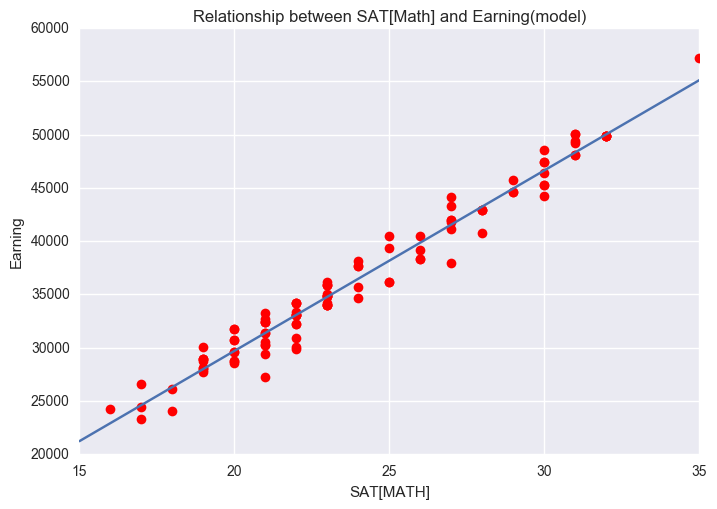

In [21]:
fit = np.polyfit(x_test['ACTMTMID'],lm.predict(x_test),1)
p = np.poly1d(fit)

plt.plot(x_test['ACTMTMID'], lm.predict(x_test), 'ro')
xp = np.linspace(15, 35, 50)
orange = plt.plot(xp, p(xp), '-')

plt.title("Relationship between SAT[Math] and Earning(model)")
plt.xlabel("SAT[MATH]")
plt.ylabel("Earning")
plt.show()

In [22]:
print("Mean square error for the model is:", np.mean((y_test - lm.predict(x_test)) ** 2)) 
print("The estimated coeficient of English is: ", lm.coef_[0])
print("The estimated coeficient of Math is: ", lm.coef_[1])
print("The estimated coeficient of Writing is: ", lm.coef_[2])

Mean square error for the model is: 42488041.97791104
The estimated coeficient of English is:  -1076.09957108
The estimated coeficient of Math is:  2811.35207771
The estimated coeficient of Writing is:  223.65933888


In [24]:
print(lm.predict([30,30,11]))

[ 47890.72193148]


C:\Users\darry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Regression tree
## Question: Predicting income based on XXX.

Input: <br>
Class label: MD_EARN_WNE_P6

SAT Score , CONTROL, locale of institute, 


In [25]:
#Preparing the data
income = df_copy.copy()
income = income[ (income["MD_EARN_WNE_P6"] > 0) & (income["ACTMTMID"] > 0) & (income.ACTMTMID > 0) & (income.ACTWRMID > 0)]
income["CONTROL_NUM"] = income["CONTROL"].astype("category")
income["CONTROL_NUM"] = income["CONTROL_NUM"].cat.rename_categories([1,2,3])

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
ind = np.random.rand(len(income)) < 0.8
trainingSet = income[ind]
testingSet = income[~ind]

X = np.sort(np.array(trainingSet[["ACTMTMID"]]))
y = np.sort(trainingSet["MD_EARN_WNE_P6"].values)
rt = DecisionTreeRegressor(max_depth=500)

testPredictor = np.array(testingSet[["ACTMTMID"]])
rt.fit(X,y)
pred =  rt.predict(testPredictor)
testClass = testingSet["MD_EARN_WNE_P6"].values

'''
plt.figure()
plt.plot(X, y, 'ro', label="data")
plt.plot(testPredictor,pred, color="cornflowerblue", label="Test", linewidth=2)
plt.show()
'''
print (testClass)
print("Test mean square error:", np.mean((testClass - pred) ** 2))

[ 34800.  38000.  37200.  26200.  40100.  29500.  65400.  45300.  34000.
  44600.  24400.  34800.  34500.  40500.  49000.  32900.  30200.  33400.
  25100.  41300.  59400.  25000.  29900.  42800.  34400.  25600.  40000.
  60500.  33900.  38200.  31900.  41300.  48300.  36000.  37700.  41800.
  32000.  29700.  24200.  23600.  33500.  30400.  28900.  33800.  30400.
  37100.  37100.  37100.  38400.  38400.  36800.  29200.  38100.  33400.
  33500.  30300.  38900.  28600.  26900.  42600.  34800.  24800.  31600.
  34500.  27900.  30700.]
Test mean square error: 83367858.5678


In [29]:
#Preparing the data
income = df_copy.copy()
income = income[ (income["MD_EARN_WNE_P6"] > 0) & (income["ACTMTMID"] > 0) & (income.ACTMTMID > 0) & (income.ACTWRMID > 0)]
income["INCOME_RANGE"] = pd.cut(income["MD_EARN_WNE_P6"], bins=2, labels=["Low","High"])
income["CONTROL_NUM"] = income["CONTROL"].astype("category")
income["CONTROL_NUM"] = income["CONTROL_NUM"].cat.rename_categories([1,2,3])

from sklearn import tree
ind = np.random.rand(len(income)) < 0.7
trainingSet = income[ind]
testingSet = income[~ind]

X = trainingSet[["ACTMTMID","ACTWRMID","ACTWRMID","CONTROL_NUM"]]
Y = trainingSet["INCOME_RANGE"]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

actual = testingSet["INCOME_RANGE"]
pred = clf.predict(testingSet[["ACTMTMID","ACTWRMID","ACTWRMID","CONTROL_NUM"]])

pd.crosstab(actual, pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,High,Low
Actual,,
Low,5,86
High,4,1


In [ ]:
income["TUITIONFEE_PROG"].dropna()